In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

In [4]:
def getDummy(df):
    df_dummy = pd.get_dummies(df,drop_first=True)
    return df_dummy

def dropYZ(df):
    df_drop = df.drop(columns=["y","z"],axis=1)
    return df_drop
    
def dropXYZ(df):
    df_drop = df.drop(columns=["x","y","z"],axis=1)
    return df_drop

def standarize(df):
    df_standar = df.set_index("id")
    

def dropPrice(df):
    df_drop = df.drop(columns=["price"],axis=1)
    return df_drop

def toCSV(df,name):
    df.to_csv(f"../outputs/{name}.csv")
    
def indexId(df):
    df_id = df.set_index("id")
    return df_id

def getStandarTrain(dftr,dftt):
    dftr = indexId(dftr)
    dftr = getDummy(dftr)
    dftr = dropXYZ(dftr)
    
    X = dropPrice(dftr)
    y = dftr["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    dftt_standar = dftt.set_index("id")
    dftt_standar = getDummy(dftt_standar)
    dftt_standar = dropXYZ(dftt_standar)

    #NO HAY QUE HACER FIT EN TEST: NO --> scaler.fit(dftt_standar)

    Xtt_scaler = scaler.transform(dftt_standar)

    Xtt_scaler = pd.DataFrame(Xtt_scaler)

    return X_train, X_test, y_train, y_test, Xtt_scaler

In [5]:
# TRAINING dataset
dftr = pd.read_csv("../inputs/diamonds_train.csv")
dftr.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [6]:
# TEST dataset
dftt = pd.read_csv("../inputs/diamonds_test.csv")
dftt.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


# 6 Model

In [7]:
from sklearn.svm import SVR

In [21]:
X_train, X_test, y_train, y_test, dftt_scaler = getStandarTrain(dftr,dftt)

In [22]:
model_clf = SVR(C=1.0, epsilon=0.2) 

model_clf.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

y_pred = model_clf.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_clf.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

(32276, 20) (32276,)
r2: 0.04573492874145402
r2_test: 0.05360191318074581


In [23]:
y_six = model_clf.predict(dftt_scaler)

In [24]:
dftt_scaler["price"]=y_six

In [25]:
df_res6 = pd.DataFrame()
df_res6["predicc"]=y_test_pred.round(2)
df_res6["test"]=y_test.reset_index(drop=True)
df_res6["diff"]=abs(y_test_pred - y_test.reset_index(drop=True))

df_res6

,predicc,test,diff
0,2256.56,945,1311.560778
1,3039.26,5408,2368.738058
2,2432.80,2803,370.198415
3,2143.82,570,1573.817087
4,3110.78,14692,11581.222934
...,...,...,...
8064,2481.70,3428,946.302732
8065,1892.88,792,1100.881278
8066,2948.41,4579,1630.590556
8067,2284.97,1574,710.974853


In [26]:
msre6 = mean_squared_error(y_test, y_test_pred)
msre6

14465479.7932296

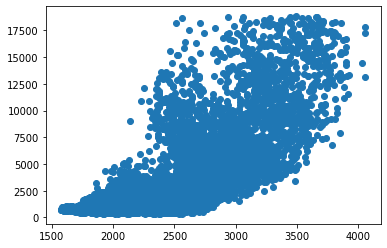

In [27]:
test6_df = df_res6[["predicc","test"]].sort_values("test",ascending=True).reset_index()
plt.scatter(test6_df["predicc"], test6_df["test"])

In [28]:
dftt_scaler

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,price
0,0.628123,0.313791,0.248206,-0.316098,-0.81479,1.701266,-0.537231,-0.467012,-0.461688,-0.515486,...,-0.340256,-0.233295,-0.18642,-0.563706,2.200411,-0.420625,-0.543644,-0.269203,-0.322754,3378.254363
1,-0.609618,0.524508,-0.204401,-0.316098,1.22731,-0.587798,-0.537231,-0.467012,-0.461688,-0.515486,...,2.938963,-0.233295,-0.18642,1.773975,-0.454460,-0.420625,-0.543644,-0.269203,-0.322754,2405.844689
2,2.579140,0.103074,0.700814,-0.316098,-0.81479,1.701266,-0.537231,-0.467012,-0.461688,1.939918,...,-0.340256,-0.233295,-0.18642,1.773975,-0.454460,-0.420625,-0.543644,-0.269203,-0.322754,3725.343379
3,0.858889,-1.231468,1.153422,-0.316098,-0.81479,1.701266,-0.537231,-0.467012,2.165967,-0.515486,...,-0.340256,-0.233295,-0.18642,1.773975,-0.454460,-0.420625,-0.543644,-0.269203,-0.322754,3099.225741
4,-0.525704,0.032835,-1.109617,-0.316098,1.22731,-0.587798,-0.537231,-0.467012,2.165967,-0.515486,...,-0.340256,-0.233295,-0.18642,1.773975,-0.454460,-0.420625,-0.543644,-0.269203,-0.322754,2136.599291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,-1.050171,-1.231468,0.248206,-0.316098,-0.81479,1.701266,-0.537231,2.141273,-0.461688,-0.515486,...,-0.340256,-0.233295,-0.18642,-0.563706,-0.454460,-0.420625,1.839440,-0.269203,-0.322754,1949.512966
13445,-0.525704,-0.669556,-0.657009,-0.316098,1.22731,-0.587798,-0.537231,-0.467012,-0.461688,-0.515486,...,-0.340256,-0.233295,-0.18642,-0.563706,-0.454460,-0.420625,-0.543644,-0.269203,3.098334,1942.101000
13446,-1.197021,-0.318361,0.248206,-0.316098,-0.81479,-0.587798,1.861396,2.141273,-0.461688,-0.515486,...,-0.340256,-0.233295,-0.18642,-0.563706,-0.454460,-0.420625,-0.543644,3.714662,-0.322754,1963.904294
13447,-1.050171,-0.248122,0.248206,-0.316098,1.22731,-0.587798,-0.537231,-0.467012,-0.461688,-0.515486,...,-0.340256,-0.233295,-0.18642,-0.563706,-0.454460,-0.420625,1.839440,-0.269203,-0.322754,1670.968702


In [29]:
dftt_scaler.iloc[0,:]

0           0.628123
1           0.313791
2           0.248206
3          -0.316098
4          -0.814790
5           1.701266
6          -0.537231
7          -0.467012
8          -0.461688
9          -0.515486
10          2.350676
11         -0.340256
12         -0.233295
13         -0.186420
14         -0.563706
15          2.200411
16         -0.420625
17         -0.543644
18         -0.269203
19         -0.322754
price    3378.254363
Name: 0, dtype: float64

## 7 Model

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [85]:
X_train, X_test, y_train, y_test, dftt_scaler = getStandarTrain(dftr,dftt)

In [86]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

In [87]:
model_st = RandomForestRegressor(n_estimators=500) 

model_st.fit(X_poly, y_train)

print(X_poly.shape,y_train.shape)

y_pred = model_st.predict(X_poly)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_st.predict(X_test_poly)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

(32276, 231) (32276,)
r2: 0.9970651053803523
r2_test: 0.9759675898280001


In [88]:
Xtt_poly = polynomial_features.fit_transform(dftt_scaler)
y_seven = model_st.predict(Xtt_poly)

In [89]:
dftt_scaler["price"]=y_seven

In [90]:
df_res7 = pd.DataFrame()
df_res7["predicc"]=y_test_pred.round(2)
df_res7["test"]=y_test.reset_index(drop=True)
df_res7["diff"]=(y_test_pred - y_test.reset_index(drop=True))

df_res7.sort_values("diff",ascending=False).head(50)

,predicc,test,diff
733,17122.64,10470,6652.639619
5381,17372.18,11867,5505.175000
5928,16426.98,11226,5200.978933
7088,14865.63,9856,5009.630500
7065,16085.49,11115,4970.493267
3964,10287.62,5361,4926.619333
279,16522.73,11825,4697.727000
4275,9126.64,4459,4667.637833
7264,17332.45,12883,4449.449000
4361,14281.83,9853,4428.834000


In [91]:
msre7 = mean_squared_error(y_test, y_test_pred)
msre7

376617.1451189154

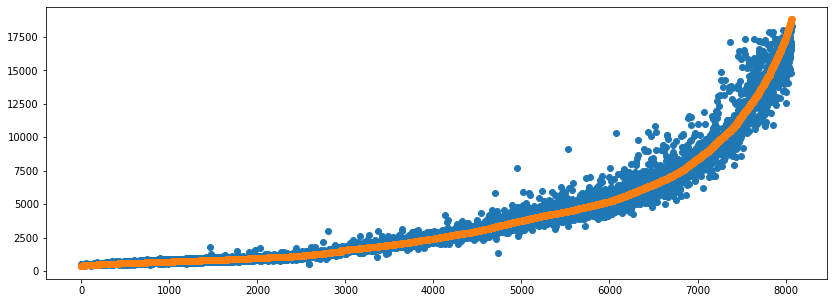

In [92]:
plt.figure(figsize=(14,5))
test7_df = df_res7[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)
plt.plot(test7_df,"o");

In [93]:
dftt_scaler = dftt_scaler[['price']]
dftt_scaler.index.names = ['id']
dftt_scaler

,price
id,
0,4531.510562
1,1062.749667
2,17736.213048
3,6567.615000
4,1536.507200
...,...
13444,691.779229
13445,2573.013667
13446,510.037000


In [60]:
toCSV(dftt_scaler,"d3_s3")

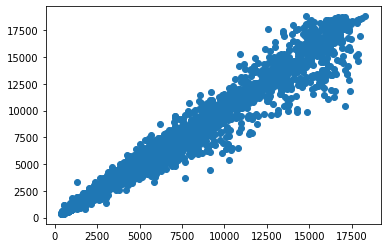

In [94]:
plt.scatter(test7_df["predicc"], test7_df["test"])

# 8 Model

In [ ]:

###### MODELO INTERRUMPIDO PARA REALIZAR OTRO #######
'''
X_train, X_test, y_train, y_test, dftt_scaler = getStandarTrain(dftr,dftt)

polynomial_features= PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model_st = RandomForestRegressor(n_estimators=500) 

model_st.fit(X_poly, y_train)

print(X_poly.shape,y_train.shape)

y_pred = model_st.predict(X_poly)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_st.predict(X_test_poly)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

Xtt_poly = polynomial_features.fit_transform(dftt_scaler)
y_eight = model_st.predict(Xtt_poly)

dftt_scaler["price"]=y_eight

df_res8 = pd.DataFrame()
df_res8["predicc"]=y_test_pred.round(2)
df_res8["test"]=y_test.reset_index(drop=True)
df_res8["diff"]=(y_test_pred - y_test.reset_index(drop=True))

display(df_res8.sort_values("diff",ascending=False).head(10))

msre8 = mean_squared_error(y_test, y_test_pred)
print(msre8)

plt.figure(figsize=(14,5))
test8_df = df_res8[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.plot(test8_df,"o")

dftt_scaler = dftt_scaler[['price']]
dftt_scaler.index.names = ['id']

toCSV(dftt_scaler,"d3_s4")

plt.figure(figsize=(12,6))
plt.scatter(test8_df["predicc"], test8_df["test"])
'''


In [74]:
dftr_up = dftr[dftr.price > 10000]

(3111, 231) (3111,)
r2: 0.9970651053803523
r2_test: 0.9759675898280001


,predicc,test,diff
296,16865.19,11602,5263.190000
117,16220.29,11200,5020.291200
433,15475.43,11114,4361.432333
632,14452.04,10162,4290.041000
575,14709.12,10424,4285.124467
323,17134.66,13006,4128.662733
174,16639.96,12515,4124.965000
409,17413.55,13387,4026.550783
725,16742.23,12743,3999.228667
350,14172.46,10182,3990.463600


1594380.8429533711


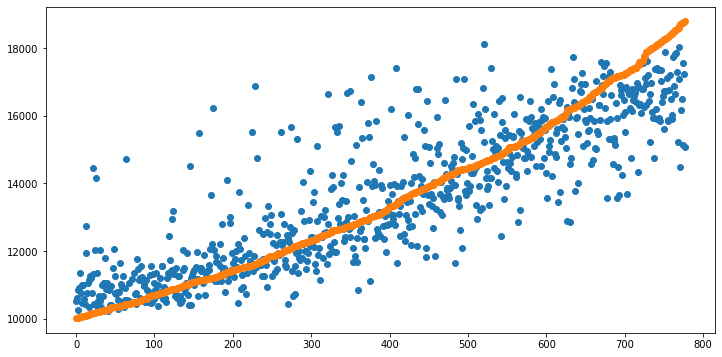

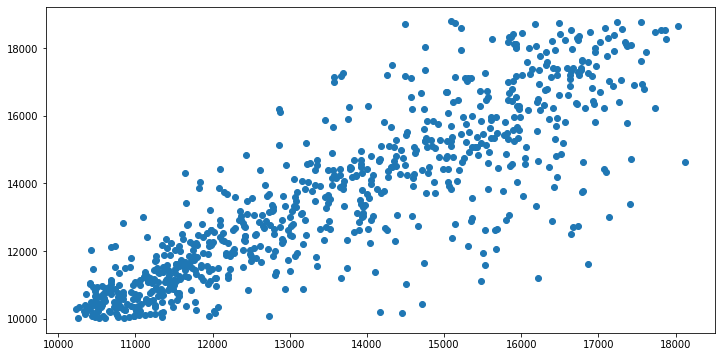

In [106]:
X_train2, X_test2, y_train2, y_test2, dftt_scaler2 = getStandarTrain(dftr_up,dftt)

pol = 1
if pol == 1:
    polynomial_features= PolynomialFeatures(degree=2)
    X_train2 = polynomial_features.fit_transform(X_train2)
    X_test2 = polynomial_features.fit_transform(X_test2)

model_2 = RandomForestRegressor(n_estimators=500) 

model_2.fit(X_train2, y_train2)

print(X_poly2.shape,y_train2.shape)


y_pred2 = model_2.predict(X_train2)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r22 = metrics.r2_score(y_train2,y_pred2)
print("r2:",r2)


y_test_pred2 = model_2.predict(X_test2)

r2_test2 = metrics.r2_score(y_test2,y_test_pred2)
print("r2_test:",r2_test)

if pol == 1:
    Xtt_poly2 = polynomial_features.fit_transform(dftt_scaler2)
    y_nine = model_2.predict(Xtt_poly2)
else:
    y_nine = model_2.predict(dftt_scaler2)


dftt_scaler2["price"]=y_nine

df_res9 = pd.DataFrame()
df_res9["predicc"]=y_test_pred2.round(2)
df_res9["test"]=y_test2.reset_index(drop=True)
df_res9["diff"]=(y_test_pred2 - y_test2.reset_index(drop=True))

display(df_res9.sort_values("diff",ascending=False).head(10))

msre9 = mean_squared_error(y_test2, y_test_pred2)
print(msre9)

test9_df = df_res9[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.plot(test9_df,"o")

dftt_scaler2 = dftt_scaler2[['price']]
dftt_scaler2.index.names = ['id']

#toCSV(dftt_scaler,"d3_s4")

plt.figure(figsize=(12,6))
plt.scatter(test9_df["predicc"], test9_df["test"])

In [107]:
dftt_scaler2

,price
id,
0,10511.341200
1,10549.318600
2,16308.481505
3,10580.810467
4,10681.730500
...,...
13444,10589.473000
13445,11150.745000
13446,11078.834333


In [108]:
y_nine

array([10511.3412    , 10549.3186    , 16308.48150476, ...,
       11078.83433333, 10479.66116667, 10809.7852881 ])

In [109]:
dftt_scaler["price_model_2"]= y_nine

price_def = []
for ind,val in enumerate(y_seven):
    if val > 10000:
        price_def.append(y_nine[ind])
    else:
        price_def.append(val)

dftt_scaler["price_def"]=price_def

dftt_scaler

,price,price_model_2,price_def
id,,,
0,4531.510562,10511.341200,4531.510562
1,1062.749667,10549.318600,1062.749667
2,17736.213048,16308.481505,16308.481505
3,6567.615000,10580.810467,6567.615000
4,1536.507200,10681.730500,1536.507200
...,...,...,...
13444,691.779229,10589.473000,691.779229
13445,2573.013667,11150.745000,2573.013667
13446,510.037000,11078.834333,510.037000


In [110]:
df_sub = dftt_scaler[["price_def"]].rename(columns={"price_def": "price"})
df_sub

,price
id,
0,4531.510562
1,1062.749667
2,16308.481505
3,6567.615000
4,1536.507200
...,...
13444,691.779229
13445,2573.013667
13446,510.037000


In [111]:
toCSV(df_sub,"last_chance")